# Deep Learning on MNIST

[Resource](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html)

This tutorial demonstrates how to build a simple **feedforward neural network** (with one hidden layer) and train it from scratch with NumPy to recognize handwritten digit images.

# Before We Begin

Feedforward refers to recognition-inference architecture of neural networks. As you already know, artificial neural networks architectures are based on inputs multiplied by weights to obtain outputs.

On the other hand, recurrent neural networks, or neural networks with loops, allow information from later processing stages to feed back to earlier stages for sequence processing. However, at every stage of inference a feedforward multiplication remains the core, essential for backpropagation.

Thus, neural networks cannot contain feedback like negative feedback or positive feedback where the outputs feed back to the very same inputs and modify them, as this will form an infinite loop.

Essentially, it's not possible to rewind in time to generate an error signal through backpropagation.

# Continuing with the lesson

Your deep learning model - one of the most basic artificial neural networks that resembles the original multi-layer perceptron - will learn to classify digits from 0 to 9 from the MNIST dataset.

The dataset contains 60,000 training and 10,000 test images and corresponding labels. Each training and test image is of size 784 (or 28x28 pixels) - this will be your input for the neural network.

Based on the image inputs and their labels (supervised learning), your neural network will be trained to learn their features using forward propagation and backpropagation (reverse-mode differentiation). The final output of the network is a vector of 10 scores - one for each handwritten digit image. You will also be evaluate how good your model is at classifying the images on the test set.

# Load the MNIST Dataset

In this section, you will download the zipped MNIST dataset files. Then, you will transform them into 4 files of NumPy array type using built-in Python modules. Finally, you will split the arrays into training and test sets.

1) Define a variable to store the training/test image/label names of the MNIST dataset in the list:

In [18]:
data_sources = {
    "training_images": "train-images-idx3-ubyte.gz",  # 60,000 training images.
    "test_images": "t10k-images-idx3-ubyte.gz",  # 10,000 test images.
    "training_labels": "train-labels-idx1-ubyte.gz",  # 60,000 training labels.
    "test_labels": "t10k-labels-idx1-ubyte.gz",  # 10,000 test labels.
}

2) Load the data. First check if the data is stored locally; if not, then download it.

In [19]:
import requests
import os

data_dir = "data"
os.makedirs(data_dir, exist_ok=True)

base_url = "https://ossci-datasets.s3.amazonaws.com/mnist/"

for fname in data_sources.values():
    fpath = os.path.join(data_dir, fname)
    if not os.path.exists(fpath):
        print("Downloading file: " + fname)
        resp = requests.get(base_url + fname, stream=True)
        resp.raise_for_status()
        with open(fpath, "wb") as fh:
            for chunk in resp.iter_content(chunk_size=128):
                fh.write(chunk)

3) Decompress the 4 files and create 4 `ndarrays`, saving them into a dictionary. Each original image is of size 28x28 and neural networks normally expect a 1D vector input; therefore, you also need to reshape the images by multiplying 28 by 28 (784).

In [20]:
import gzip
import numpy as np

mnist_dataset = {}

# Images
for key in ("training_images", "test_images"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(
            mnist_file.read(), np.uint8, offset=16
        ).reshape(-1, 28 * 28)
# Labels
for key in ("training_labels", "test_labels"):
    with gzip.open(os.path.join(data_dir, data_sources[key]), "rb") as mnist_file:
        mnist_dataset[key] = np.frombuffer(mnist_file.read(), np.uint8, offset=8)

4) Split the data into training and test sets using the standard notation of `x` for data and `y` for labels, calling the training and test set images `x_train` and `x_test`, and the labels `y_train` and `y_test`:

In [21]:
x_train, y_train, x_test, y_test = (
    mnist_dataset["training_images"],
    mnist_dataset["training_labels"],
    mnist_dataset["test_images"],
    mnist_dataset["test_labels"],
)

5) You can confirm that the shape of the image array is `(60000, 784)` and `(10000, 784)` for training and test sets, respectively, and the labels - `(60000,)` and `(10000, )`:

In [22]:
print(
    f"The shape of training images: {x_train.shape} and training labels: {y_train.shape}"
    )

print(
    f"The shape of test images: {x_test.shape} and test labels: {y_test.shape}"
)

The shape of training images: (60000, 784) and training labels: (60000,)
The shape of test images: (10000, 784) and test labels: (10000,)


6) And you can inspect some images using Matplotlib:

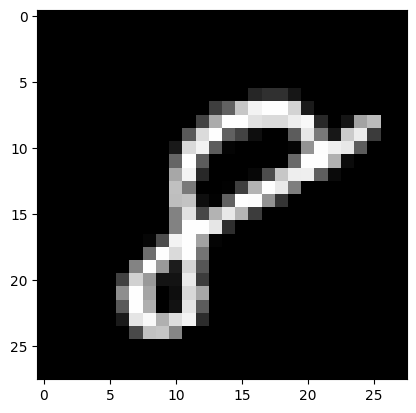

In [23]:
import matplotlib.pyplot as plt

# Take the 60,000th image (indexed at 59,999) from the training set,
# reshape from (784, ) to (28, 28) to have a valid shape for displaying purposes.
mnist_image = x_train[59999, :].reshape(28, 28)
# Set the color mapping to grayscale to have a black background.
plt.imshow(mnist_image, cmap="gray")
# Display the image.
plt.show()

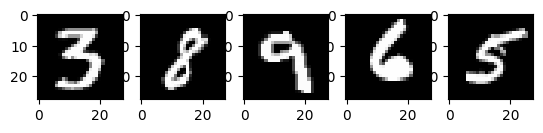

In [24]:
# Display 5 random images from the training set
num_examples = 5
seed = 147197952744
rng = np.random.default_rng(seed)

fig, axes = plt.subplots(1, num_examples)
for sample, ax in zip(rng.choice(x_train, size=num_examples, replace=False), axes):
    ax.imshow(sample.reshape(28, 28), cmap="gray")

Above are five 3images from the MNIST training set. Various hand-drawn Arabic numerals are shows, with exact values chosen randomly with each run of the code.

**Note:** You can also visualize a sample image as an array by printing `x_train[59999]`. Here, `59999` is your 60,000th training image sample. Your output will be quite long and should contain an array of 8-bit integers:

In [26]:
x_train[59999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [25]:
# Display the label of the 60,000th image from the training set
y_train[59999]

np.uint8(8)

# Preprocess the Data

Neural networks can work with inputs that are in a form of tensors (multidimensional arrays) of floating-point type. When preprocessing the data, you should consider the following processes: vectorization and conversion to a floating-point format.

**Vectorization** is simple converting a matrix into one vector.

Since the MNIST data is already vectorized and the arrays are of `dtype` `uint8`, your next challenge is to convert them to a floating-point format, such as `float64` (double-precision):

- Normalizing the image data: a feature scaling procedure that can speed up the neural network training process by standardizing the distribution of your input data.
- One-hot/categorical encoding of the image labels.

In practice, you can use different types of floating-point precision depending on your goals and you can find more information about that in the [Nvidia](https://blogs.nvidia.com/blog/2019/11/15/whats-the-difference-between-single-double-multi-and-mixed-precision-computing/) and [Google Cloud](https://cloud.google.com/blog/products/ai-machine-learning/bfloat16-the-secret-to-high-performance-on-cloud-tpus) blog posts.

## Convert the image data to the floating-point format

The images data contain 8-bit integers encoded in the [0, 255] interval with color values between 0 and 255.

You will normalize them into floating-point arrays in the [0, 1] interval by dividing them by 255.

1) Check that the vectorized image data has type `uint8`:

In [27]:
print("The data type of training images: {}".format(x_train.dtype))
print("The data type of test images: {}".format(x_test.dtype))

The data type of training images: uint8
The data type of test images: uint8


2) Normalize the arrays by dividing them by 255 (and thus promoting the data type from `uint8` to `float64`) and then assign the train and test image data variables - `x_train` and `x_test` - to `training_images` and `train_labels`, respectively. To reduce the model training and evaluation time in this example, only a subset of the training and test images will be used. Both `training_images` and `test_images` will contain only 1,000 samples each out of the complete datasets of 60,000 and 10,000 images, respectively. These values can be controlled by changing the `training_sample` and `test_sample` below, up to their maximum values of 60,000 and 10,000.

In [ ]:
training_sample, test_sample = 1000, 1000
training_images = x_train[0:training_sample] / 255
test_images = x_test[0:test_sample] / 255

255


You can also do it this way for a more elegant solution:

In [32]:
training_sample, test_sample = 1000, 1000
training_images = x_train[0:training_sample] / x_train.max()
test_images = x_test[0:test_sample] / x_test.max()

3) Confirm that the image data has changed to the floating-point format:

In [36]:
print("The data type of training images: {}".format(training_images.dtype))
print("The data type of test images: {}".format(test_images.dtype))

The data type of training images: float64
The data type of test images: float64


**Note:** You can also check that normalization was successful by printing `training_images[0]`. Your output should contain an array of floating-point numbers:

In [34]:
print(training_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Convert the labels to floating point through categorical/one-hot encoding

You will use one-hot encoding to embed each digit label as an all-zero vector with `np.zeros()` and place `1` for a label index. As a result, your label data will be arrays with `1.0` (or `1.`) in the position of each image label.

Since there are 10 labels (from 0 to 9) in total, your arrays will look similar to this:

`array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])`

1) Confirm that the image label data are integers with `dtype` `uint8`:

In [37]:
print("The data type of training labels: {}".format(y_train.dtype))
print("The data type of test labels: {}".format(y_test.dtype))

The data type of training labels: uint8
The data type of test labels: uint8


2) Define a function that performs one-hot encoding on arrays:

In [38]:
def one_hot_encoding(labels, dimension=10):
    """Define a one-hot variable for an all-zero vector
    with 10 dimensions (number labels from 0 to 9)"""
    one_hot_labels = labels[..., None] == np.arange(dimension)[None]
    # Return one-hot encoded labels
    return one_hot_labels.astype(np.float64)

3) Encode the labels and assign the values to new variables:

In [39]:
training_labels = one_hot_encoding(y_train[:training_sample])
test_labels = one_hot_encoding(y_test[:test_sample])

4) Check that the data type has changed to floating point:

In [40]:
print("The data type of training labels: {}".format(training_labels.dtype))
print("The data type of test labels: {}".format(test_labels.dtype))

The data type of training labels: float64
The data type of test labels: float64


5) Examine a few encoded labels:

In [41]:
print(training_labels[0])
print(training_labels[1])
print(training_labels[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


... and compare to the originals:

In [42]:
5
0
4

4

Dataset preparation is complete.

# Build and Train a Small Neural Network from Scratch

In this section you will familiarize yourself with some hig-level concepts of the basic building blocks of a deep learning mode.

Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to identify handwritten digits from the MNIST dataset with a certain level of accuracy.

## Neural network building blocks with NumPy

- *Layers:* These building blocks work as data filters - they process data and learn representations from inputs to better predict the target outputs.

You will use 1 hidden layer in your model to pass the inputs forward (forward propagation) and propagate the gradients/error derivatives of a loss function backward (backpropagation). These are input, hidden, and output layers.

In the hidden (middle) and output (last) layers, the neural network model will compute the weighted sum of inputs. To compute this process, you will use NumPy's matrix multiplication function `np.dot(layer, weights)`.

**Note:** For simplicity, the bias term is omitted in this example (there is no `np.dot(layer, weights) + bias`).

= *Weights:* These are important adjustable parameters that the neural network fine-tunes by forward and backward propagating the data. They are optimized through a process called gradient descent. Before the model training starts, the weights are randomly initialized with NumPy's `Generator.random()`.

The optimal weights should produce the highest prediction accuracy and the lowest error on the training and test sets.

- *Activation function:* Deep learning models are capable of determining non-linear relationships between inputs and outputs and these non-linear functions are usually applied to the output of each layer.